In [77]:
# Data Imports
import numpy as np
import pandas as pd
from pandas import Series,DataFrame

# Math
import math

# Plot imports
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

# Machine Learning Imports
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# For evaluating our ML results
from sklearn import metrics

# Dataset Import
import statsmodels.api as sm

### Basic Mathematical Overview

First, let's take a look at the Logistic Function. The logistic function can take an input from negative to positive infinity and it has always has an output between 0 and 1. The logistic function is defined as: $$ \sigma (t)= \frac{1}{1+e^{-t}}$$

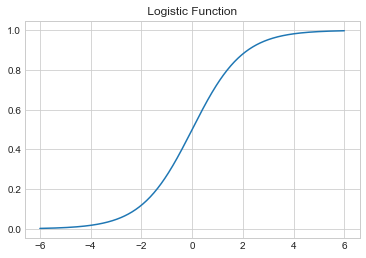

In [78]:
# Logistic Function
def logistic(t):
    return 1.0 / (1 + math.exp((-1.0)*t) )

# Set t from -6 to 6 ( 500 elements, linearly spaced)
t = np.linspace(-6,6,500)

# Set up y values (using list comprehension)
y = np.array([logistic(ele) for ele in t])

# Plot
plt.plot(t,y)
plt.title(' Logistic Function ')

### Overview
If we remember back to the Linear Regression Lectures, we could describe a Linear Regression Function model as: $$ y_i = \beta _1 x_{i1} + ... + \beta _i x_{ip}$$

Which was basically an expanded linear equation (y=mx+b) for various x data features. In the case of the above equation, we presume a data set of 'n' number of units, so that the data set would have the form: $$ [ y_i, x_{i1},...,x_{ip}]^{n}_{i=1}$$

For our logistic function, if we view t as a linear function with a variable x we could express t as: $$ t = \beta _0 + \beta _1 x $$

Here, we've basically just substituted a linear function (form similar to y=mx+b) for t. We could then rewrite our logistic function equation as: $$ F(x)= \frac{1}{1+e^{-(\beta _0 + \beta _1 x)}}$$

### Resources
- http://cs229.stanford.edu/notes/cs229-notes1.pdf
- http://www.stat.cmu.edu/~cshalizi/uADA/12/lectures/ch12.pdf
- https://en.wikipedia.org/wiki/Logistic_regression

---

### Data Analysis

DataSet Description
From the Statsmodels website we have the following information about the data:

Number of observations: 6366 Number of variables: 9 Variable name definitions:


- rate_marriage   : How rate marriage, 1 = very poor, 2 = poor, 3 = fair, 4 = good, 5 = very good
- age             : Age
- yrs_married     : No. years married. Interval approximations. See original paper for detailed explanation.
- children        : No. children
- religious       : How relgious, 1 = not, 2 = mildly, 3 = fairly, 4 = strongly
- educ            : Level of education, 9 = grade school, 12 = high school, 14 = some college, 16 = college graduate, 17 = some graduate school, 20 = advanced degree
- occupation      : 1 = student, 2 = farming, agriculture; semi-skilled, or unskilled worker; 3 = white-colloar; 4 = teacher counselor social worker, nurse; artist, writers; technician, skilled worker, 5 = managerial, administrative, business, 6 = professional with advanced degree
- occupation_husb : Husband's occupation. Same as occupation.
- affairs         : measure of time spent in extramarital affairs


See the original paper for more details.

Why a Statsmodels data set? So you can have the option of working through additional example datasets included in SciKit Learn and their own tutorials.

In [79]:
# loading dataset 
df = sm.datasets.fair.load_pandas().data

In [80]:
df.head()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs
0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0,0.111111
1,3.0,27.0,13.0,3.0,1.0,14.0,3.0,4.0,3.230769
2,4.0,22.0,2.5,0.0,1.0,16.0,3.0,5.0,1.400000
3,4.0,37.0,16.5,4.0,3.0,16.0,5.0,5.0,0.727273
4,5.0,27.0,9.0,1.0,1.0,14.0,3.0,4.0,4.666666


In [81]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6366 entries, 0 to 6365
Data columns (total 9 columns):
rate_marriage      6366 non-null float64
age                6366 non-null float64
yrs_married        6366 non-null float64
children           6366 non-null float64
religious          6366 non-null float64
educ               6366 non-null float64
occupation         6366 non-null float64
occupation_husb    6366 non-null float64
affairs            6366 non-null float64
dtypes: float64(9)
memory usage: 447.7 KB


In [82]:
df.describe()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs
count,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000
mean,4.109645,29.082862,9.009425,1.396874,2.426170,14.209865,3.424128,3.850141,0.705374
std,0.961430,6.847882,7.280120,1.433471,0.878369,2.178003,0.942399,1.346435,2.203374
min,1.000000,17.500000,0.500000,0.000000,1.000000,9.000000,1.000000,1.000000,0.000000
25%,4.000000,22.000000,2.500000,0.000000,2.000000,12.000000,3.000000,3.000000,0.000000
50%,4.000000,27.000000,6.000000,1.000000,2.000000,14.000000,3.000000,4.000000,0.000000
75%,5.000000,32.000000,16.500000,2.000000,3.000000,16.000000,4.000000,5.000000,0.484848
max,5.000000,42.000000,23.000000,5.500000,4.000000,20.000000,6.000000,6.000000,57.599991


In [83]:
# Creating affairs columns
def had_affair(x):
    if x != 0 : return 1
    else: return 0
    

In [84]:
df['had_affair'] = df['affairs'].apply(had_affair)

In [85]:
df.head()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs,had_affair
0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0,0.111111,1
1,3.0,27.0,13.0,3.0,1.0,14.0,3.0,4.0,3.230769,1
2,4.0,22.0,2.5,0.0,1.0,16.0,3.0,5.0,1.400000,1
3,4.0,37.0,16.5,4.0,3.0,16.0,5.0,5.0,0.727273,1
4,5.0,27.0,9.0,1.0,1.0,14.0,3.0,4.0,4.666666,1


In [86]:
# Lets look at the people who had affairs
df.groupby('had_affair').mean()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs
had_affair,,,,,,,,,
0,4.329701,28.390679,7.989335,1.238813,2.504521,14.322977,3.405286,3.833758,0.000000
1,3.647345,30.537019,11.152460,1.728933,2.261568,13.972236,3.463712,3.884559,2.187243


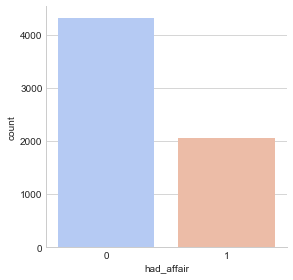

In [87]:
sns.factorplot('had_affair', data=df, kind='count', palette='coolwarm')
plt.show()

- Most women did not have an affair, about half of the women did have some kind of an affair

In [88]:
len(df['age'].unique()) # The survey was only conducted on 6 different ages, kind of weird

6

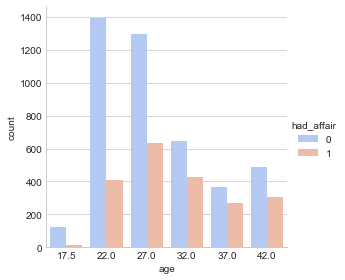

In [89]:
sns.factorplot('age', data=df, kind='count', hue='had_affair', palette='coolwarm')
plt.show()

- Females in their early 20s were less likely to have an affair

In [90]:
len(df['yrs_married'].unique()) # The survey was only conducted on 7 different years married groups, kind of weird

7

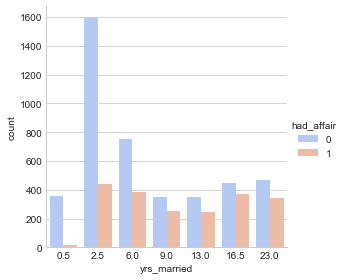

In [91]:
sns.factorplot('yrs_married', data=df, kind='count', hue='had_affair', palette='coolwarm')
plt.show()

- The longer you were married, the more likely you were to have an affair

In [92]:
len(df['children'].unique()) # The survey was only conducted on 6 cateogories of children


6

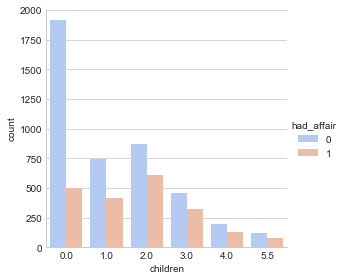

In [93]:
sns.factorplot('children', data=df, kind='count', hue='had_affair', palette='coolwarm')
plt.show()

- The less number of children, the more likelu you were to have an affair
- But you were also having a less sample size

In [94]:
len(df['educ'].unique()) # The survey was only conducted on 6 cateogories of education


6

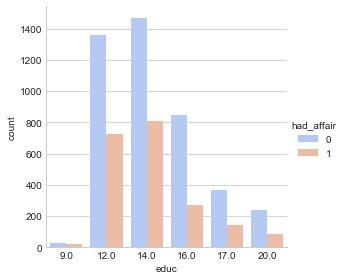

In [95]:
sns.factorplot('educ', data=df, kind='count', hue='had_affair', palette='coolwarm')
plt.show()

- The studies was conducted on females who completed high school and some college

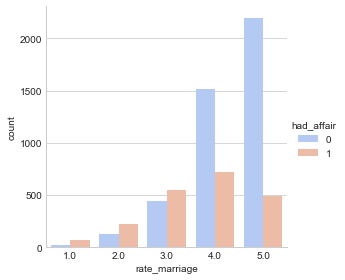

In [96]:
#  1 = very poor, 2 = poor, 3 = fair, 4 = good, 5 = very good
sns.factorplot('rate_marriage', data=df, kind='count', hue='had_affair', palette='coolwarm')
plt.show()

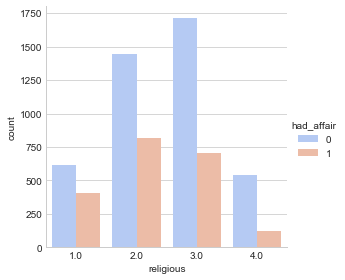

In [97]:
#  1 = not, 2 = mildly, 3 = fairly, 4 = strongly
sns.factorplot('religious', data=df, kind='count', hue='had_affair', palette='coolwarm')
plt.show()


### Dummy Variables

In [98]:
# Make data for the dummy variables bc they are categorical data
occ_dummies = pd.get_dummies(df['occupation'])
hus_occ_dummmies = pd.get_dummies(df['occupation_husb'])


In [99]:
# dummy variables make a df with the column assigned to the diff type of categories
# we need to make categories bc we need to keep the regression with discrete variables and 
# not continous variables

In [100]:
occ_dummies.columns = ['occ1', 'occ2', 'occ3', 'occ4', 'occ5', 'occ6']

In [101]:
hus_occ_dummmies.columns = ['hocc1', 'hocc2', 'hocc3', 'hocc4', 'hocc5', 'hocc6']

In [102]:
X = df.drop(['occupation', 'occupation_husb', 'had_affair'], axis=1) # had_affair is the target variable

In [103]:
# put together the dummy variables
dummies = pd.concat([occ_dummies, hus_occ_dummmies], axis=1)
dummies.head()

,occ1,occ2,occ3,occ4,occ5,occ6,hocc1,hocc2,hocc3,hocc4,hocc5,hocc6
0,0,1,0,0,0,0,0,0,0,0,1,0
1,0,0,1,0,0,0,0,0,0,1,0,0
2,0,0,1,0,0,0,0,0,0,0,1,0
3,0,0,0,0,1,0,0,0,0,0,1,0
4,0,0,1,0,0,0,0,0,0,1,0,0


In [104]:
X = pd.concat([X, dummies], axis=1)
X.head()

,rate_marriage,age,yrs_married,children,religious,educ,affairs,occ1,occ2,occ3,occ4,occ5,occ6,hocc1,hocc2,hocc3,hocc4,hocc5,hocc6
0,3.0,32.0,9.0,3.0,3.0,17.0,0.111111,0,1,0,0,0,0,0,0,0,0,1,0
1,3.0,27.0,13.0,3.0,1.0,14.0,3.230769,0,0,1,0,0,0,0,0,0,1,0,0
2,4.0,22.0,2.5,0.0,1.0,16.0,1.400000,0,0,1,0,0,0,0,0,0,0,1,0
3,4.0,37.0,16.5,4.0,3.0,16.0,0.727273,0,0,0,0,1,0,0,0,0,0,1,0
4,5.0,27.0,9.0,1.0,1.0,14.0,4.666666,0,0,1,0,0,0,0,0,0,1,0,0


In [105]:
y = df['had_affair']
y.head()

0    1
1    1
2    1
3    1
4    1
Name: had_affair, dtype: int64

### Multicollinearity

- Think about it. The dummy vairables you created with the occupation are all highly correlated bc if one is a "1" then rest are 0. Thus, the model might pick this up even though they are highly correlated with one another and might bring some lower predictive model for other datasets.
- Remeber the way to avoid this is to drop a column and it will help you take out the high correlation

In [106]:
X.head()

,rate_marriage,age,yrs_married,children,religious,educ,affairs,occ1,occ2,occ3,occ4,occ5,occ6,hocc1,hocc2,hocc3,hocc4,hocc5,hocc6
0,3.0,32.0,9.0,3.0,3.0,17.0,0.111111,0,1,0,0,0,0,0,0,0,0,1,0
1,3.0,27.0,13.0,3.0,1.0,14.0,3.230769,0,0,1,0,0,0,0,0,0,1,0,0
2,4.0,22.0,2.5,0.0,1.0,16.0,1.400000,0,0,1,0,0,0,0,0,0,0,1,0
3,4.0,37.0,16.5,4.0,3.0,16.0,0.727273,0,0,0,0,1,0,0,0,0,0,1,0
4,5.0,27.0,9.0,1.0,1.0,14.0,4.666666,0,0,1,0,0,0,0,0,0,1,0,0


In [107]:
# Drop the first occ1 and hocc1
X.drop(['occ1', 'hocc1'], axis=1, inplace=True)

In [109]:
X.head()

,rate_marriage,age,yrs_married,children,religious,educ,affairs,occ2,occ3,occ4,occ5,occ6,hocc2,hocc3,hocc4,hocc5,hocc6
0,3.0,32.0,9.0,3.0,3.0,17.0,0.111111,1,0,0,0,0,0,0,0,1,0
1,3.0,27.0,13.0,3.0,1.0,14.0,3.230769,0,1,0,0,0,0,0,1,0,0
2,4.0,22.0,2.5,0.0,1.0,16.0,1.400000,0,1,0,0,0,0,0,0,1,0
3,4.0,37.0,16.5,4.0,3.0,16.0,0.727273,0,0,0,1,0,0,0,0,1,0
4,5.0,27.0,9.0,1.0,1.0,14.0,4.666666,0,1,0,0,0,0,0,1,0,0


In [110]:
# Need to drop the affairs bc its a repeat of the Y target
X.drop('affairs', inplace=True, axis=1)

In [111]:
X.head()

,rate_marriage,age,yrs_married,children,religious,educ,occ2,occ3,occ4,occ5,occ6,hocc2,hocc3,hocc4,hocc5,hocc6
0,3.0,32.0,9.0,3.0,3.0,17.0,1,0,0,0,0,0,0,0,1,0
1,3.0,27.0,13.0,3.0,1.0,14.0,0,1,0,0,0,0,0,1,0,0
2,4.0,22.0,2.5,0.0,1.0,16.0,0,1,0,0,0,0,0,0,1,0
3,4.0,37.0,16.5,4.0,3.0,16.0,0,0,0,1,0,0,0,0,1,0
4,5.0,27.0,9.0,1.0,1.0,14.0,0,1,0,0,0,0,0,1,0,0


In [112]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: had_affair, dtype: int64

In [115]:
# Flatenend the array
y = np.ravel(y)
y

array([1, 1, 1, ..., 0, 0, 0])

In [117]:
# Building the model
logmodel = LogisticRegression()

logmodel.fit(X, y)
logmodel.score(X,y) # our accuracy is a 72.5%

0.72588752748978946

In [119]:
# the mean of women had the affair are 0.32249450204209867 
# the mean of women that did not have an affair are 0.6775054979579014 (1-.32249450204209867)
y.mean()

0.32249450204209867

In [121]:
# The null error rate tells us we are doing 5% better than just saying all the females had no affair 
# We would of miss those who did

In [150]:
coeff_df = DataFrame(X.columns, np.transpose(logmodel.coef_)[:,0])
coeff_df.reset_index(inplace=True)
coeff_df.columns = ['Coefficient', 'Features']

In [152]:
coeff_df

,Coefficient,Features
0,-0.697846,rate_marriage
1,-0.056336,age
2,0.103893,yrs_married
3,0.018185,children
4,-0.368507,religious
5,0.008647,educ
6,0.298119,occ2
7,0.608150,occ3
8,0.346511,occ4
9,0.942260,occ5


In [153]:
# these represents the likilihood of having an affair
# for the occupation, all are positive so this mean that one we drop
# has the lowest prob. of having an affair

### Testing and Training Datasets

In [155]:
X_train, X_test, y_train, y_test = train_test_split(X,y)

In [156]:
logmodel2 = LogisticRegression()

In [157]:
logmodel2.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [158]:
class_predict = logmodel2.predict(X_test)

In [159]:
# comparing the actual values for y with the predicted values based our model
print(metrics.accuracy_score(y_test, class_predict)) 

0.725502512563


### More Resources 
- https://en.wikipedia.org/wiki/Regularization_%28mathematics%29#Regularization_in_statistics_and_machine_learning
- http://blog.yhat.com/posts/logistic-regression-and-python.html
- http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html
- http://aimotion.blogspot.com/2011/11/machine-learning-with-python-logistic.html